### <center>Deep Learning : Computer Vision</center>

### <center>Project 7 : Plant Seedlings Image Classification</center>

#### <u>Goal</u>: Create a Classifier capable of determining a Plant's Species from a photo.

#### Data Description:  
You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.  
Dataset: The dataset can be download from Olympus. The data file names are:  
* images.npy  (Renamed to : "Plant_Images.npy")  
* Labels.csv  (Renamed to : "Plant_Labels.csv")  

The original files are from Kaggle: Link to the Kaggle project site: https://www.kaggle.com/c/plant-seedlings-classification/data?select=train. Due to the large volume of data, the images were converted to <u>images.npy</u> file and the labels are also put into the <u>Labels.csv</u>. So that you can work on the data/project seamlessly without worrying about the high data volume.  

<u>Note</u>: For this project purposes, download the data provided on Olympus in the above mentioned file. <u>Do NOT</u> use the original Kaggle dataset.

#### Tasks, Rubric & Steps to Follow:  

1. Import Libs & Load Data: 5 Marks:  
a. Import Libraries  
b. Load dataset  
c. Print Data Shape  
d. Visualize the Images in dataset  

2. Data Pre-Processing: 15 Marks:  
a. Normalization  
b. Gaussian Blurring  
c. Visualize data after pre-processing  

3. Make Data Compatible: 10 Marks:  
a. Convert labels to one-hot-vectors  
b. Print the label for y_train[0]  
c. Split the dataset into Training, Testing, & Validation sets  
   *(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)*  

  d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.  

4. Building CNN: 15 Marks:  
a. Define layers  
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)  

5. Modelling 10 Marks:  
a. Fit and Evaluate the Model  
b. Print Confusion Matrix  

6. Visualize Predictions For : 5 Marks:  
a. x_test[2]  
b. x_test[3]  
c. x_test[33]  
e. x_test[36]  
f. x_test[59]  


### ⬇ Begin Code:  
#### ⬇ Load Libraries :  

In [2]:
# ⬇====== Standard Libraries Begin ======⬇ #

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt  # Data visualization for Ploting  
import matplotlib.image as mpimg  # To handle plot images, diskfile save, retrieve, render/display 

from matplotlib import cm  # Color Maps  
from mpl_toolkits.mplot3d import Axes3D  # MSB: For 3D plots: 5 USL KMeans Case Study Mr.Tom 
%matplotlib inline  

import pandas as pd  # to handle data in form of rows and columns
import pandas_profiling 
from pandas import ExcelWriter  # Outputs a Excel disk file

# %tensorflow_version 2  # Line magic function (its not working here)
import tensorflow as tf 
from tensorflow import keras 

from tensorflow.keras.datasets import mnist  # For CV 
from tensorflow.keras.models import load_model  # For CV 
from tensorflow.keras.preprocessing import image  # For CV 
from tensorflow.keras.utils import to_categorical  # Caterogical Encoder : Like OneHot Encoder 
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Generate batches of tensor image data with realtime data augmentation. Read img file thru directories.  
from tensorflow.keras import initializers, optimizers, Sequential 
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization 

# from category_encoders import OrdinalEncoder 

from scipy.stats import zscore, pearsonr, randint as sp_randint  # For LinReg 
from scipy.signal import convolve2d  # For CV: Convolve two 2-dimensional arrays 

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer  

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, binarize, LabelBinarizer, LabelEncoder, OneHotEncoder 

from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # LinRegr
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, \
                            f1_score, roc_curve, roc_auc_score, classification_report, auc  # LogRegr

# For Linear Dimensionality (Cols/Attributes) Reduction to a Lower dimensional space (eg: reduce 15 cols to 2 cols): 
from sklearn.decomposition import PCA  # 5 UL : "Principal Component Analysis" for "Singular Value Decomposition" (SVD) 

from sklearn.pipeline import Pipeline, make_pipeline  # M.Rao
from sklearn.manifold import TSNE  # For CV 

from skimage import io, data  # For CV 

import cv2   # OpenCV lib for CV, which works with Numpy, SciPy, Matplotlib.
import h5py  # For CV : Stores huge data in binary format for NumPy use. Eg: Slice multi TByte disk data, as if it was real NumPy arrays. 

from termcolor import colored  # For CV 

from zipfile import ZipFile  # For CV 

from yellowbrick.regressor import ResidualsPlot
from yellowbrick.classifier import ClassificationReport, ROCAUC


# Utilities: 

# "Aalmond" library is self created by myself (Manoj S Bhave) and is made available publically on PyPi.org which provides 3 Functions: 
# 1. vitalStats(df) : Extends df.describe() output to include outliers, -ve, zero, nulls, uniques values, modes, skewness, etc. 
# 2. showOutL(df) : Detects, Displays and Imputes outlier values based on IQR method. 
# 3. showdfQ(df) : Displays dataframe rows from a variety of sections of the df like mid df, mid q1/q3 of df, head, tail, random etc. 

# import Aalmond.Aalmond as aa 
import time, os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# Multiple output displays per cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import Image, Markdown
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>")) # Increase cell width

# ===== Settings ===== 
pd.options.display.float_format = '{:,.2f}'.format  # Remove scientific notations to display numbers with 2 decimals
pd.set_option('display.max_columns', 100)  # Max df cols to display set to 100.
pd.set_option('display.max_rows', 50)  # Max df rows to display set to 50.
# pd.set_option('display.max_rows', tdf.shape[0]+1)  # just one row more than the total rows in df

print('TensorFlow Version:', tf.__version__)
print('Keras Version:', keras.__version__)


# ⬆====== Standard Libraries End ======⬆ #


TensorFlow Version: 2.3.0
Keras Version: 2.4.0


In [3]:
# ⬇====== Google CoLab Libraries Begin ======⬇ 


# from google.colab.patches import cv2_imshow

# Install & Import Tensorboard for Colab modules for creating a tensorboard call back which will passed in model.fit function.

# !pip install tensorboardcolab
# !pip install category_encoders
# !pip install Aalmond

# from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback 

# Tensorboard callback is going to be added to model.fit function to draw graphs of loss values after every epoch
# tbc = TensorBoardColab()

# from google.colab import drive
# drive.mount('/content/drive')


# ⬆====== Google CoLab End ======⬆ #


#### ⬇ Custom Functions:  

In [4]:
# Define Reusable Function: 
def LossAccPlot(history): 

    """  
    Custom Local Function: For Deep Learning Neural Network Project:  

    Plots 2 Curves Side by Side for Train & Validation Datasets (Color Coded):  
    
    1. Loss over Epochs.  
    2. Accuracy over Epochs.  
       
    """  
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(np.array(history.history['loss']) * 100)
    plt.plot(np.array(history.history['val_loss']) * 100)
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'])
    plt.title('Loss Over Epochs')

    plt.subplot(1, 2, 2)
    plt.plot(np.array(history.history['accuracy']) * 100)
    plt.plot(np.array(history.history['val_accuracy']) * 100)
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'])
    plt.title('Accuracy Over Epochs')

    plt.tight_layout()
    plt.show();

In [5]:
# Display some sample images from given datasets : 
# Inputs: arx, ary = both should be of type numpy.ndarray arrays

def showImgs(arx, ary, imgs=7, rand=True): 
    x, y = (1, imgs)
    l = len(arx)-1

    if rand:
        img = np.random.randint(l, size=imgs)  # Random integers (imgs) in the range of length of dataset (number of rows)
    else: 
        img = range(imgs)  # Display first n ("imgs") images 
    
    fig, axes = plt.subplots(nrows=x, ncols=y, figsize=(15, 5))

    for i in range(y): 

        plt.subplot(x, y, i+1)
        
        plt.imshow(arx[img[i]])  # show the random image from the dataset taht corresponds to the random number generated above
        plt.title(str(img[i]) + ':' + ary[img[i]])  # show the image name corresponding to the image selected above

    plt.tight_layout() 
    plt.show();


In [6]:
# Displays the Actual .vs. Predicted Labels & Names of an Image with the corresponding Image from x_test

def ImgActPred(x_test, y_test, img):
    
    y_pred = model.predict(x_test[img].reshape(1, 128, 128, 3))
    
    lbl_actl = y_test[img].argmax()
    lbl_pred = y_pred.argmax()

    print('')
    print('⬇ Actual .vs. Predicted for x_test('+str(img)+')')
    print('⬇ Label & Name: ACTUAL    :', lbl_actl, y_trn_hot.columns[lbl_actl]) 
    print('⬇ Label & Name: PREDICTED :', lbl_pred, y_trn_hot.columns[lbl_pred])

    np.set_printoptions(precision=6, suppress=True)

    print('')
    print('⬇ OneHot y_test Values:', y_test[img])
    print('⬇ Softmax Outputs: Sum y_pred:', y_pred.sum(), ' = ', y_pred)

    # print('\n* Plant Name Label for y_valid[2]:', pd.DataFrame(y_test).join(y_trn).iloc[1, -1])
    
    plt.imshow(x_test[img].reshape(128, 128, 3))
    plt.show();



#### ⬇ Step 1: a. Load Dataset; b. Import Libs (Done above); c. Print Data Shape; d. Visualize the Images in dataset: ⬇  

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# df_path = '/Users/RiddhiSiddhi/Documents/msb/07 DL CV Big Data Files/'
df_path = '/content/drive/My Drive/Colab Notebooks/' 

img_file = 'Plant_Images.npy'
lbl_file = 'Plant_Labels.csv'

In [9]:
# Load Plant images & labels data files into respective datasets: 

x_trn = np.load(df_path + img_file) 
y_trn = pd.read_csv(df_path + lbl_file) 


In [10]:
# Identify Shape, Type, Stats, etc of datasets: 

# For Images Dataset x_trn: 
print('\n* Images data: Shape & Type:', x_trn.shape, type(x_trn), x_trn.dtype) 

print('\n* Images data: Negative Values:', (x_trn < 0).sum(), '  * Missing/Null Values:', np.isnan(x_trn).sum(), 
      '  * Min & Max Values Range:', x_trn.min(), 'To', x_trn.max())

print('\n* Images data: Dimensions:', len(x_trn.shape), ' * Rows:', x_trn.shape[0], 
      ' * Columns:', x_trn.shape[1], 'x', x_trn.shape[2], ' * Colors:', x_trn.shape[3], 
      ' (Total 4750 Images in RGB Colors of size 128 x 128 pixels)')

# For Labels Dataset y_trn: 
print('\n* Label data: Null Values:', y_trn.isna().sum())
print('\n* Labels data: Shape, Data Type, Type:', y_trn.shape, y_trn.Label.dtype, type(y_trn)) 
print('\n* Labels data: Unique Plants Count (Classes):' , y_trn.nunique()) 
print('\n* Labels data: Unique Plants Value Counts:') 
pd.DataFrame(y_trn.Label.value_counts()) 
y_trn.describe().T



* Images data: Shape & Type: (4750, 128, 128, 3) <class 'numpy.ndarray'> uint8

* Images data: Negative Values: 0   * Missing/Null Values: 0   * Min & Max Values Range: 0 To 255

* Images data: Dimensions: 4  * Rows: 4750  * Columns: 128 x 128  * Colors: 3  (Total 4750 Images in RGB Colors of size 128 x 128 pixels)

* Label data: Null Values: Label    0
dtype: int64

* Labels data: Shape, Data Type, Type: (4750, 1) object <class 'pandas.core.frame.DataFrame'>

* Labels data: Unique Plants Count (Classes): Label    12
dtype: int64

* Labels data: Unique Plants Value Counts:


,Label
Loose Silky-bent,654
Common Chickweed,611
Scentless Mayweed,516
Small-flowered Cranesbill,496
Fat Hen,475
Charlock,390
Sugar beet,385
Cleavers,287
Black-grass,263
Shepherds Purse,231


,count,unique,top,freq
Label,4750,12,Loose Silky-bent,654


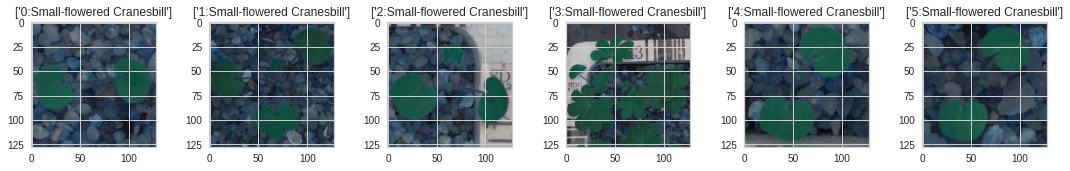

In [11]:
# Display a few sample images in original provided format & colors: 
showImgs(x_trn, y_trn.values, imgs=6, rand=False)

#### ⬇ Step 2: Data Pre-Processing: ⬇  
a. Normalization  
b. Gaussian Blurring  
c. Visualize data after Pre-Processing  

Notes: Convert to Gray Scale Images, Resize to smaller Images? Convert X_trn to float32 when Normalizing using /255

In [12]:
# Step 2a: Normalization: Normalize image data: 

x_trn_nor = x_trn.astype('float32') / 255.0

print('* Train Dataset Original  :', x_trn.dtype, x_trn.shape, type(x_trn))
print('* Train Dataset Normalized:', x_trn_nor.dtype, x_trn_nor.shape, type(x_trn_nor))

print('* Min & Max Normalized Values Range:', x_trn_nor.min(), 'To', x_trn_nor.max())

* Train Dataset Original  : uint8 (4750, 128, 128, 3) <class 'numpy.ndarray'>
* Train Dataset Normalized: float32 (4750, 128, 128, 3) <class 'numpy.ndarray'>
* Min & Max Normalized Values Range: 0.0 To 1.0


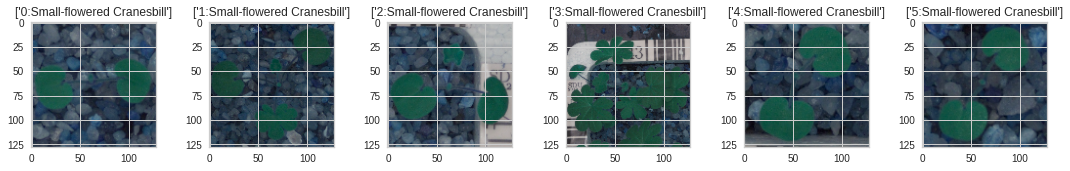

In [13]:
# After Normalization: Display a few sample images from the Normalized dataset: 
showImgs(x_trn_nor, y_trn.values, imgs=6, rand=False)

In [14]:
# # Step 2b: Gaussian Blurring: Apply Gaussian Blurring to the Normalized Images: 

x_trn_nor_blr = np.empty([ x_trn_nor.shape[0], x_trn_nor.shape[1], x_trn_nor.shape[2], x_trn_nor.shape[3] ], dtype='float32')

print('* Before Blur:', type(x_trn_nor_blr), x_trn_nor_blr.shape, x_trn_nor_blr.dtype)

for i in range(x_trn_nor.shape[0]): 
    x_trn_nor_blr[i] = cv2.GaussianBlur(x_trn_nor[i], (5, 5), 0)
    
print('* After  Blur:', type(x_trn_nor_blr), x_trn_nor_blr.shape, x_trn_nor_blr.dtype)
print('* Min & Max Normalized Values Range:', x_trn_nor_blr.min(), 'To', x_trn_nor_blr.max())


* Before Blur: <class 'numpy.ndarray'> (4750, 128, 128, 3) float32
* After  Blur: <class 'numpy.ndarray'> (4750, 128, 128, 3) float32
* Min & Max Normalized Values Range: 0.0 To 0.9998162


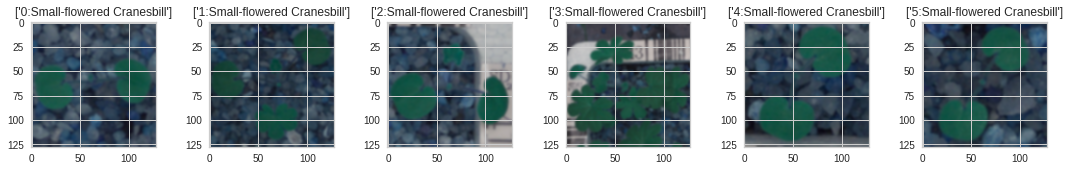

In [15]:
# Step 2c: Visualize data after Pre-Processing: 
# After Blurring (Gaussian) on the Normalized image dataset : 
# Display a few sample images from the Blurred (Gaussian) Image dataset: 

showImgs(x_trn_nor_blr, y_trn.values, imgs=6, rand=False)


#### ⬇ Step 3. Make Data Compatible: ⬇  
a. Convert labels to one-hot-vectors  
b. Print the label for y_train[0]  
c. Split the dataset into Training, Testing, & Validation sets  
   *(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)*  

  d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.  



In [16]:
# Step 3a: Convert labels to one-hot-vectors: 

y_trn_hot = pd.get_dummies(y_trn)

type(y_trn_hot), y_trn_hot.shape, y_trn_hot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Label_Black-grass                4750 non-null   uint8
 1   Label_Charlock                   4750 non-null   uint8
 2   Label_Cleavers                   4750 non-null   uint8
 3   Label_Common Chickweed           4750 non-null   uint8
 4   Label_Common wheat               4750 non-null   uint8
 5   Label_Fat Hen                    4750 non-null   uint8
 6   Label_Loose Silky-bent           4750 non-null   uint8
 7   Label_Maize                      4750 non-null   uint8
 8   Label_Scentless Mayweed          4750 non-null   uint8
 9   Label_Shepherds Purse            4750 non-null   uint8
 10  Label_Small-flowered Cranesbill  4750 non-null   uint8
 11  Label_Sugar beet                 4750 non-null   uint8
dtypes: uint8(12)
memory usage: 55.8 KB


(pandas.core.frame.DataFrame, (4750, 12), None)

In [50]:
# Step 3b: Print the label for y_train[0] : 

ytrn_img = 0  # For y_train[0]

lbl_y0 = y_trn_hot.iloc[ytrn_img].argmax()

print('\n* Plant Label & Name for ytrain[0]:', lbl_y0, y_trn_hot.columns[lbl_y0])
print('\n* OneHot ytrain Values:', y_trn_hot.values[ytrn_img])

y_trn_hot.T[lbl_y0]


* Plant Label & Name for ytrain[0]: 10 Label_Small-flowered Cranesbill

* OneHot ytrain Values: [0 0 0 0 0 0 0 0 0 0 1 0]


Label_Black-grass                  0
Label_Charlock                     0
Label_Cleavers                     0
Label_Common Chickweed             0
Label_Common wheat                 0
Label_Fat Hen                      0
Label_Loose Silky-bent             0
Label_Maize                        0
Label_Scentless Mayweed            0
Label_Shepherds Purse              0
Label_Small-flowered Cranesbill    1
Label_Sugar beet                   0
Name: 10, dtype: uint8

In [51]:
# Convert the One Hot Coded Labels df (y_trn_hot) to numpy array (y_trn_hot_arr) : 

print(type(y_trn_hot), y_trn_hot.shape) 

y_trn_hot_arr = y_trn_hot.values 

print(type(y_trn_hot_arr), y_trn_hot_arr.shape, y_trn_hot_arr.dtype)


<class 'pandas.core.frame.DataFrame'> (4750, 12)
<class 'numpy.ndarray'> (4750, 12) uint8


In [52]:
# Step 3c: Split the dataset into training, testing, and validation set: 

### As per Academic Support Guidance Message on Project Forum on Fri.Sep 25, 12:03 AM:
### "The 1st point is correct. 
### However, in the 2nd point, you have to split the resulting 70% *train* dataset into *Train* and Validation (50%)"

### This is Contrary to the Problem Statement Hint in Step 3c. Per the Guidance above with 3 hash (###) comments: 
### Hence, now the post spilt Datasets will become Train 35%, Valid 35%, Test 30%) 

# x_train, x_test , y_train, y_test  = train_test_split( x_trn_nor_blr, y_trn_hot_arr, test_size=0.3, random_state=3 )
# x_train, x_valid, y_train, y_valid = train_test_split( x_train      , y_train      , test_size=0.5, random_state=3 )

### *** LATEST Academic Support Guidance Message on Project Forum on Fri.Sep 25, 10:57 AM:
### *** "Ideally, you should split the validation set from the training set. But here in this project, you have to split it from the testing set. 
### *** The moderator will be looking for the implementation of the deliverables mentioned in the project problem statement."

### *** So per the above LATEST Guidance we will follow the HINT in Step 3c Problem Statement which is as follows: 

# 1. first Split Images & Labels into Training & Testing sets: test_size = 0.3 
# (Of the Total: Datasets will become Train: 70%, Test: 30%) 

# 2. Then further split *Test* Data into *Test* & Validation sets" test_size = 0.5 
# (Of the Total: Datasets will become Val: 15%, Test: 15%) 

# Split data into 3 datasets: Train (70%), Valid (15%), Test (15%): 

x_train, x_test , y_train, y_test  = train_test_split( x_trn_nor_blr, y_trn_hot_arr, test_size=0.3, random_state=3 )
x_test , x_valid, y_test , y_valid = train_test_split( x_test       , y_test   , test_size=0.5, random_state=3 )


In [61]:
# Step 3d: Check the Data Types & Shapes: Display datasets sizes after the 3 x way splits:  Train, Valid, Test : 

print(type(x_train), x_train.shape, x_train.dtype) 
print(type(y_train), y_train.shape, y_train.dtype) 

print(type(x_valid), x_valid.shape, x_valid.dtype) 
print(type(y_valid), y_valid.shape, y_valid.dtype) 

print(type(x_test), x_test.shape  , x_test.dtype) 
print(type(y_test), y_test.shape  , y_test.dtype) 


<class 'numpy.ndarray'> (3325, 128, 128, 3) float32
<class 'numpy.ndarray'> (3325, 12) uint8
<class 'numpy.ndarray'> (713, 128, 128, 3) float32
<class 'numpy.ndarray'> (713, 12) uint8
<class 'numpy.ndarray'> (712, 128, 128, 3) float32
<class 'numpy.ndarray'> (712, 12) uint8


In [62]:
# Step 3d: Check the Data Types & Shapes: Calculate the expected datasets sizes after the 3 x way splits: Train, Valid, Test : 

print('x_train should have 70% data:', x_trn.shape[0]*0.70)
print('y_train should have 70% data:', y_trn.shape[0]*0.70)

print('x_valid should have 15% data:', x_trn.shape[0]*0.15)
print('y_valid should have 15% data:', y_trn.shape[0]*0.15)

print('x_test should have 15% data:', x_trn.shape[0]*0.15)
print('y_test should have 15% data:', y_trn.shape[0]*0.15)


x_train should have 70% data: 3325.0
y_train should have 70% data: 3325.0
x_valid should have 15% data: 712.5
y_valid should have 15% data: 712.5
x_test should have 15% data: 712.5
y_test should have 15% data: 712.5


#### Step 3d: Check the Data Types & Shapes: Comments on Data Shape / Type Compatibility with Keras models :  

* OK = ✓ Data Structure Types : "numpy arrays" : For all three datasets above are <u>ideally well suited</u> for feeding into the CNN / ANN. GOOD TO GO!  

* OK = ✓ Data Types : "Numeric: "float32" & "uint8" : For all three datasets above are <u>ideally well suited</u> for feeding into the CNN / ANN. GOOD TO GO!  

* OK = ✓ Data Shapes Columns/Dimensions: The "x_" datasets has 4 dimesions for Rows (1 dim), for Columns (2 dims) with Images of size 128 x 128 pixels (2 columns), and 1 dim for 3 RGB color channels in 3 columns. GOOD TO GO!  

* OK = ✓ Data Shapes Columns/Dimensions: The "y_" datasets has 2 dimesions with "One Hot Coded" Labels in 12 columns. GOOD TO GO!  

* OK = ✓ Data Shapes Rows: Total Data Rows = 4750, Data Rows Split 3 x Ways : Train = 3325 (70%), Valid = 712 (15%), Test = 713 (15%). The Calculated numbers of rows above <u>matches</u> with that of the Actual stats of the split datasets sizes/shapes. GOOD TO GO!  


#### ⬇ Step 4. Building CNN: ⬇  
a. Define layers  
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)  


In [173]:
# Create a df to track various experimental parameters: 
runs = 0
model_prm = pd.DataFrame(index=['CN_Layers', 'Kernals', 'Drop_Out', 'NN_Layers', 'Opt', 'Lr_Rate', 'B_Size', 'Epochs', 
                                'Act_Fn', 'Loss_Function', 'Accuracy', 'Val_Acc', 'Trn_Loss', 'Val_Loss'])
model_prm.T 


,CN_Layers,Kernals,Drop_Out,NN_Layers,Opt,Lr_Rate,B_Size,Epochs,Act_Fn,Loss_Function,Accuracy,Val_Acc,Trn_Loss,Val_Loss


In [63]:
# Step 4a: Define Layers:

CN_Layers = '3, F=32,64,32'
NN_Layers = '1, N=32'
Drop_Out  = '4, R=.2 .3 .2 .2'
Kernals    = '3,3,3'

# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 32 filters of size 5x5 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(128, 128, 3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

# Add a Convolutional Layer with 64 filters of size 5X5 and activation function as 'relu' 
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))

# Add a Convolutional Layer with 64 filters of size 5X5 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

# Add a Convolutional Layer with 128 filters of size 3X3 and activation function as 'relu' 
# model.add(Conv2D(filters=128, kernel_size=5, activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.3))

# Add Global Max Pooling 2D for Flattening and prepare to feed into ANN Dense Layer
model.add(GlobalMaxPooling2D())

# Flattening the layer before fully connected layers
# model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
# model.add(Dense(128, activation="relu"))
# model.add(Dense(64, activation="relu"))
# model.add(Dropout(0.3))

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))

# Add Fully Connected Final Output Layer with 12 units and activation function as 'softmax'
model.add(Dense(12, activation="softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        1

In [64]:
# Step 4b: Set Optimizer and Loss Function: 

lr = 0.001  # Learning Rate 
opt = optimizers.Adam(learning_rate=lr) 
# opt = optimizers.Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# Compile the model: 
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Use Early Stopping: 
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=6)  # loss, val_loss, val_accuracy
# callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Use Model Check Points: 
model_checkpoint = ModelCheckpoint('Plants_CNN_ChkPts_{epoch:02d}_loss{loss:.4f}.h5',
                   monitor = 'val_loss',
                   verbose = 1,
                   mode = 'auto',
                   save_freq = 'epoch',
                   save_best_only = True,
                   save_weights_only = True)


#### ⬇ Step 5. Fit & Evaluate / Execute the Model ⬇  
a. Fit the Model  
b. Evaluate the Model  
c. Print Confusion Matrix  


 * Start Timings: ['Sat Sep 26 01:20:03 UTC 2020'] 1601083203.9383135 

Epoch 1/100
26/26 [==============================] - ETA: 0s - loss: 2.4305 - accuracy: 0.1477
Epoch 00001: val_loss improved from inf to 2.41411, saving model to Plants_CNN_ChkPts_01_loss2.4305.h5
26/26 [==============================] - 2s 84ms/step - loss: 2.4305 - accuracy: 0.1477 - val_loss: 2.4141 - val_accuracy: 0.2174
Epoch 2/100
26/26 [==============================] - ETA: 0s - loss: 2.3194 - accuracy: 0.2433
Epoch 00002: val_loss improved from 2.41411 to 2.31944, saving model to Plants_CNN_ChkPts_02_loss2.3194.h5
26/26 [==============================] - 2s 62ms/step - loss: 2.3194 - accuracy: 0.2433 - val_loss: 2.3194 - val_accuracy: 0.2496
Epoch 3/100
26/26 [==============================] - ETA: 0s - loss: 2.1898 - accuracy: 0.2794
Epoch 00003: val_loss improved from 2.31944 to 2.19454, saving model to Plants_CNN_ChkPts_03_loss2.1898.h5
26/26 [==============================] - 2s 61ms/step - loss: 2.1

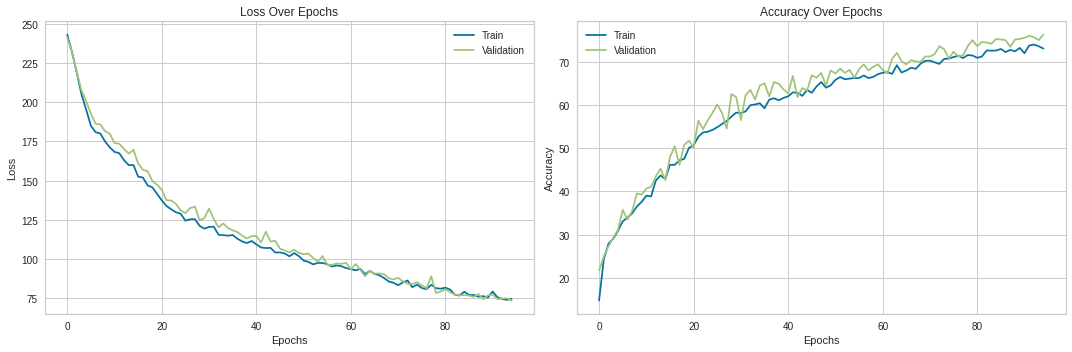

In [65]:
# Step 5a: Fit the Model

batch = 128  # 2048, 1024, 32, 512, 256, 128, 16, 64 
epochs = 100  # 12, 50, 60

d1 = !date
t1 = time.time()

print('\n * Start Timings:', d1, t1, '\n')

history = model.fit(x_train,
                    y_train,
                    verbose = 1,
                    epochs = epochs,
                    batch_size = batch,
                    validation_data = (x_valid, y_valid),
                    callbacks = [early_stopping, model_checkpoint]
                   )

d2 = !date
print('\n * End Timings:', d1, d2, (time.time() - t1)/60)

LossAccPlot(history)


In [104]:
# Step 5b: Evaluate the Model

# Get Class Prediction for Confusion Metrics:

score = model.evaluate(x_valid, y_valid, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Y_pred_cls = model.predict_classes(x_valid, batch_size=200, verbose=0)

# Get Validation Loss:
val_loss = model.evaluate(x_valid, y_valid) # , verbose=0) # [0] # model1.metrics_names[0] = 'loss' [1] = 'accuracy'

Test loss: 0.7364572286605835
Test accuracy: 0.7629733681678772
23/23 [==============================] - 0s 7ms/step - loss: 0.7365 - accuracy: 0.7630


In [105]:
def ohe2dense(labels_one_hot): 
    num_labels = labels_one_hot.shape[0]
    num_classes = labels_one_hot.shape[1] 
    labels_dense = np.where(labels_one_hot == 1)[1] 
    return labels_dense

validation_predictions = model.predict_classes(x_valid) 
report=classification_report(ohe2dense(y_valid), validation_predictions)
print(report)


              precision    recall  f1-score   support

           0       0.75      0.21      0.33        43
           1       0.75      0.72      0.74        54
           2       0.90      0.63      0.74        43
           3       0.74      0.92      0.82        75
           4       0.91      0.83      0.87        24
           5       0.81      0.85      0.83        65
           6       0.73      0.91      0.81       101
           7       0.83      0.88      0.86        34
           8       0.71      0.84      0.77        79
           9       0.47      0.16      0.24        43
          10       0.73      0.84      0.78        82
          11       0.85      0.87      0.86        70

    accuracy                           0.76       713
   macro avg       0.77      0.72      0.72       713
weighted avg       0.76      0.76      0.74       713



In [106]:
# Step 5c: Print Confusion Matrix: 

# Generate Confustion Matrix: 
print('Confusion Matrix:')
conf_mat= confusion_matrix(ohe2dense(y_valid), validation_predictions)
conf_mat

Confusion Matrix:


array([[ 9,  0,  0,  0,  1,  2, 28,  0,  2,  0,  0,  1],
       [ 0, 39,  1,  0,  0,  2,  0,  1,  2,  2,  2,  5],
       [ 0,  8, 27,  0,  0,  2,  0,  0,  1,  0,  3,  2],
       [ 0,  0,  0, 69,  0,  0,  0,  0,  1,  0,  5,  0],
       [ 0,  0,  1,  0, 20,  1,  2,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  2,  0, 55,  0,  0,  0,  0,  6,  0],
       [ 3,  0,  0,  1,  1,  1, 92,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  2,  0, 30,  0,  0,  1,  0],
       [ 0,  3,  0,  2,  0,  1,  2,  2, 66,  3,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0,  0, 17,  7,  6,  2],
       [ 0,  0,  0,  7,  0,  1,  1,  0,  0,  3, 69,  1],
       [ 0,  1,  0,  0,  0,  1,  1,  3,  1,  0,  2, 61]])

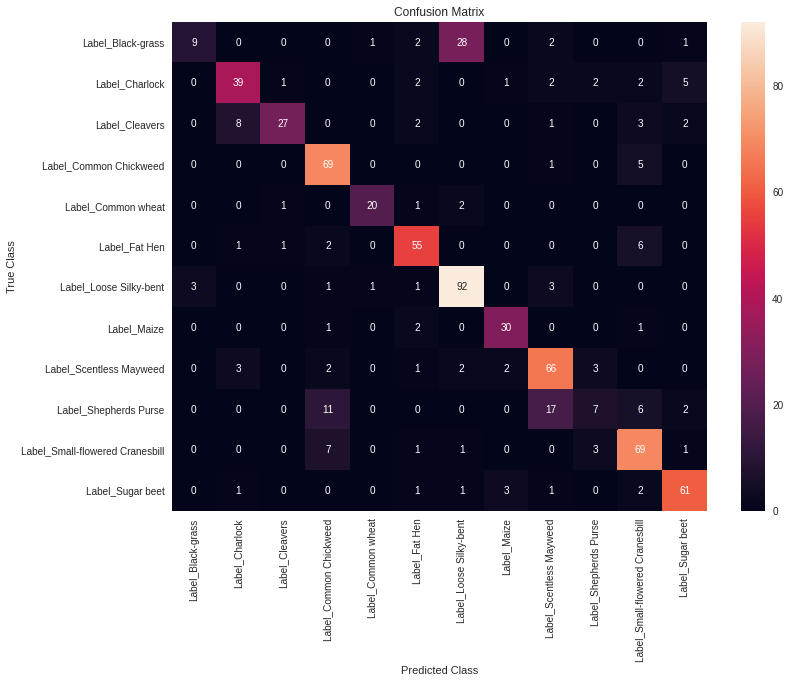

In [107]:
# Display Confusion Matrix: 

fig, ax = plt.subplots(1,figsize=(12,9))
sns.heatmap(conf_mat, annot=True, xticklabels=y_trn_hot.columns, yticklabels=y_trn_hot.columns)
plt.title('Confusion Matrix') 
plt.ylabel('True Class') 
plt.xlabel('Predicted Class') 
# fig.savefig('Confusion matrix.png', dpi=300) 
plt.show();

In [70]:
# Colab times out over a period, so cant get previous results, unless we save to a disk file.
# So ReLoad previously Saved results df for continuation tracking Results / Model Params & Stats: 

model_prm = pd.read_csv(df_path + 'model_prm.csv') 

runs = 3  # Previous Model Run number that was saved.

In [71]:
# Update the stats df with results from this run: 

runs = runs + 1
m = 'Model_' + str(runs)
model_prm[m] = [CN_Layers, Kernals, Drop_Out, NN_Layers, 'Adam', lr, batch, str(len(history.history['loss'])) + '/' + str(epochs), 
                'Relu, Softmax', 'Cat._X.entropy', max(history.history['accuracy']), val_loss[1], min(history.history['loss']), val_loss[0]
               ]


In [72]:
# Print the Current & Previous Model's Params, Stats / Results df: 

pd.options.display.float_format = '{:,.6f}'.format
print('Current Run/Model:', runs)
model_prm.T.iloc[1:]

Current Run/Model: 4


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Unnamed: 0.1,CN_Layers,Kernals,Drop_Out,NN_Layers,Opt,Lr_Rate,B_Size,Epochs,Act_Fn,Loss_Function,Accuracy,Val_Acc,Trn_Loss,Val_Loss
Model_1,"3, F=32,64,32","5,5,3","4, R=.2 .3 .2 .3","1, N=32",Adam,0.001,128,50/100,"Relu, Softmax",Cat._X.entropy,0.6279699206352234,0.6423562169075012,1.009348750114441,1.0535485744476318
Model_2,"3, F=32,64,32","5,3,3","4, R=.2 .3 .2 .2","1, N=32",Adam,0.001,128,37/100,"Relu, Softmax",Cat._X.entropy,0.7693232893943787,0.7054698467254639,0.6215503811836243,0.9656091332435608
Model_3,"3, F=32,64,32","5,3,3","4, R=.2 .3 .2 .2","1, N=32",Adam,0.001,128,77/100,"Relu, Softmax",Cat._X.entropy,0.693233072757721,0.7194951176643372,0.9015837907791138,0.882041871547699
Model_4,"3, F=32,64,32","3,3,3","4, R=.2 .3 .2 .2","1, N=32",Adam,0.001000,128,95/100,"Relu, Softmax",Cat._X.entropy,0.740150,0.762973,0.740605,0.736457


In [73]:
# Save the updated Results df to disk file for later retrival: 

model_prm.to_csv(df_path + 'model_prm.csv')

#### ⬇ Step 6. Visualize Predictions For: ⬇ 
* x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]


[0.7059064507484436, 0.7724719047546387]


⬇ Actual .vs. Predicted for x_test(2)
⬇ Label & Name: ACTUAL    : 10 Label_Small-flowered Cranesbill
⬇ Label & Name: PREDICTED : 10 Label_Small-flowered Cranesbill

⬇ OneHot y_test Values: [0 0 0 0 0 0 0 0 0 0 1 0]
⬇ Softmax Outputs: Sum y_pred: 1.0  =  [[0.000367 0.008662 0.000949 0.084985 0.000076 0.078023 0.000392 0.083735
  0.006774 0.098923 0.621905 0.015208]]


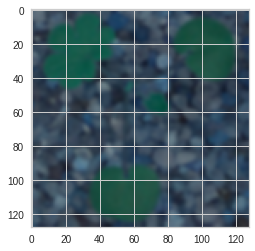


⬇ Actual .vs. Predicted for x_test(3)
⬇ Label & Name: ACTUAL    : 3 Label_Common Chickweed
⬇ Label & Name: PREDICTED : 3 Label_Common Chickweed

⬇ OneHot y_test Values: [0 0 0 1 0 0 0 0 0 0 0 0]
⬇ Softmax Outputs: Sum y_pred: 1.0  =  [[0.000023 0.000008 0.000205 0.970413 0.000258 0.001356 0.000756 0.019883
  0.000183 0.004244 0.002617 0.000054]]


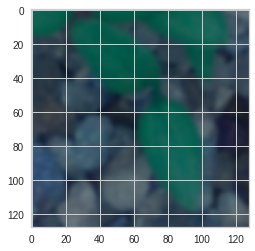


⬇ Actual .vs. Predicted for x_test(33)
⬇ Label & Name: ACTUAL    : 1 Label_Charlock
⬇ Label & Name: PREDICTED : 1 Label_Charlock

⬇ OneHot y_test Values: [0 1 0 0 0 0 0 0 0 0 0 0]
⬇ Softmax Outputs: Sum y_pred: 1.0  =  [[0.000283 0.759717 0.130822 0.000005 0.000159 0.048615 0.000015 0.000447
  0.00004  0.000706 0.0026   0.056592]]


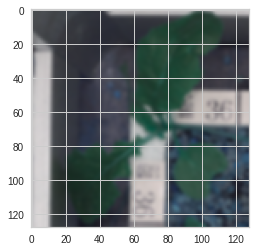


⬇ Actual .vs. Predicted for x_test(36)
⬇ Label & Name: ACTUAL    : 3 Label_Common Chickweed
⬇ Label & Name: PREDICTED : 3 Label_Common Chickweed

⬇ OneHot y_test Values: [0 0 0 1 0 0 0 0 0 0 0 0]
⬇ Softmax Outputs: Sum y_pred: 0.9999998  =  [[0.000031 0.00001  0.000271 0.97564  0.000168 0.002431 0.001083 0.014966
  0.000177 0.003081 0.002107 0.000035]]


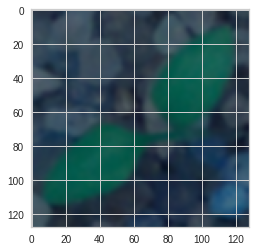


⬇ Actual .vs. Predicted for x_test(59)
⬇ Label & Name: ACTUAL    : 6 Label_Loose Silky-bent
⬇ Label & Name: PREDICTED : 6 Label_Loose Silky-bent

⬇ OneHot y_test Values: [0 0 0 0 0 0 1 0 0 0 0 0]
⬇ Softmax Outputs: Sum y_pred: 1.0  =  [[0.125742 0.       0.000005 0.00003  0.002945 0.001569 0.869456 0.000029
  0.000221 0.000001 0.       0.000002]]


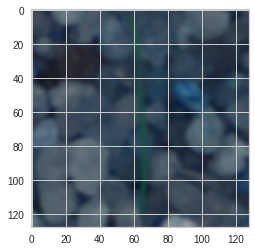

In [113]:
# Final Test: Evaluate the Model against x_test, y_test : 
# These datasets were kept Reserved & Unseen from the Model that we just build above

model.evaluate(x_test, y_test, verbose=0)

ImgActPred(x_test, y_test,  2)
ImgActPred(x_test, y_test,  3)
ImgActPred(x_test, y_test, 33)
ImgActPred(x_test, y_test, 36)
ImgActPred(x_test, y_test, 59)


### ⬆ End Code ⬆

### <center> * * * End Of File * * * </center>